# DATA 558 Homework 2: Coding
#### Anushna Prakash
#### April 16th, 2021

### 3.2 Gradient Descent

The objective function for Ridge regression is:
$$
F(\beta) = \frac{1}{2n}\sum_{i=1}^n (y_i - x_i^\top \beta)^2 + \frac{\lambda}{n} ||\beta||_2^2,
$$

Assuming that $d=1$ and $n=1$, then the function can be written as:
$$
F(\beta) = \frac{1}{2}(y - x\beta)^2 + \lambda\beta^2
$$

The gradient $\nabla F$ of $F$ can be written as:
$$
\nabla F = -x(y - x\beta) + 2\lambda\beta
$$

Now assuming that $d>1$ and $n>1$ and using the linearity of differentiation, the gradient $\nabla F(\beta)$ of $F$ can be written as:
$$
\nabla F(\beta) = \frac{-1}{n} X(Y - X^\top\beta) + \frac{2}{n} \lambda\beta
$$

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [2]:
# Load the data
file = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
penguins = pd.read_csv(file, sep = ',', header = 0)
penguins = penguins.dropna()

In [4]:
# Create our X matrix with the predictors and y vector with the response
X = penguins.drop('body_mass_g', axis = 1)
X = pd.get_dummies(X, drop_first = True).to_numpy()
y = penguins['body_mass_g'].to_numpy()

# Divide the data into training and test sets. By default, 25% goes into the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

Ridge regression requires data to be transformed into a standard scale. For each observation i in p features of X and the response variable y, we will take:
$$Z_{ip} = \frac{X_{ip} - \bar{X_{p}}}{\sigma(X_{p})}$$
or:
$$Z_{i} = \frac{y_{i} - \bar{y}}{\sigma(y)}$$

In [6]:
# Transform X
X_scaler = preprocessing.StandardScaler().fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

# Transform y
y_mean = y_train.mean(axis = 0)
y_sd = y_train.std(axis = 0)
y_train = (y_train - y_mean) / y_sd
y_test = (y_test - y_mean) / y_sd

In [7]:
def computegrad(beta, lambda_, X, y):
    """
	Parameters
	----------
	beta : numpy.ndarray
		A numpy array of size (p+1,), where p is the number of predictors.
    lambda_ : float
        Regularization hyperparameter.
    X : numpy.ndarray
        A numpy array of size (n,p+1), containing the design matrix.
    y : numpy.ndarray
        A numpy array of size (n,), containing the responses.

	Returns
	-------
	grad : numpy.ndarray
		A numpy array of size (p+1,), containing the gradient dL/dbeta.
    """
    n = X.shape[0]
    resid = y - np.dot(X, beta)
    grad = -1/n * np.dot(np.transpose(X), resid) + 2/n * lambda_ * beta
    
    return grad

In [8]:
def graddescent(init_point, step_size, max_iterations, *args):
    """Gradient of g.

	Parameters
	----------
    init_point : numpy.ndarray
		A numpy array of size (p+1) where p is the number of predictors. 
        It is an initial starting point of betas to begin gradient descent.
    step_size : float
		Learning rate, or step size in optimization.
    max_iterations : int
		Maximum number of iterations to run GD.
    *args : lambda_, X, and Y

	Returns
	-------
	iterates : list[numpy.ndarray]
		A list of numpy arrays, each of size (d,), containing the iterates of GD.
	"""
    iters = 0 # initialize counter
    beta_iters = [init_point]
    gradient = computegrad(init_point, *args)
    beta = init_point
    
    while iters < max_iterations:
        beta = beta - step_size * gradient
        gradient = computegrad(beta, *args)
        beta_iters.append(beta)
        iters += 1
    
    return beta_iters

In [9]:
def objective_f(beta, lambda_, X, y):
    """Computes the objective function F(B) that is minimized by ridge regression.

	Parameters
	----------
    beta : numpy.ndarray
    lambda_ : float
    X : numpy.ndarray
    y : numpy array

	Returns
	-------
	f : float
		The value of the objective function evaluated using beta.
	"""
    n = X.shape[0]
    resid = y - np.dot(X, beta) 
    f = 1/(2*n) * np.linalg.norm(resid)**2 + lambda_/n * np.linalg.norm(beta)**2
    
    return f

Plot the # of iterations t against the objective function $F(\beta)$.
Assume $\lambda=-5$ and $\eta=0.5$.

In [10]:
lambda_ = -5
lr = 0.5
max_iters = 1000
beta_0 = np.zeros(X.shape[1])

grad_desc_betas = graddescent(beta_0, lr, max_iters, lambda_, X_train, y_train)
ridge_function = [objective_f(b, lambda_, X_train, y_train) for b in grad_desc_betas]

Text(0, 0.5, 'Ridge Function')

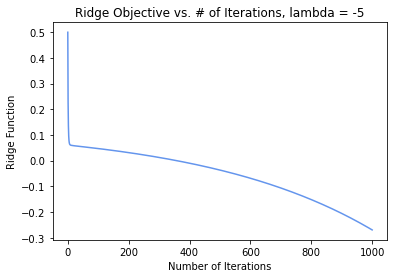

In [11]:
plt.plot(range(max_iters + 1), ridge_function, color = "cornflowerblue")
plt.title(label = 'Ridge Objective vs. # of Iterations, lambda = -5')
plt.xlabel('Number of Iterations')
plt.ylabel('Ridge Function')

Plot the # of iterations t against the objective function $F(\beta)$.
Assume $\lambda=.05$ and $\eta=0.5$.

In [12]:
lambda_ = .05
lr = 0.5
max_iters = 1000

# Calculate results
grad_desc_betas = graddescent(beta_0, lr, max_iters, lambda_, X_train, y_train)
ridge_function = [objective_f(b, lambda_, X_train, y_train) for b in grad_desc_betas]

Text(0, 0.5, 'Ridge Function')

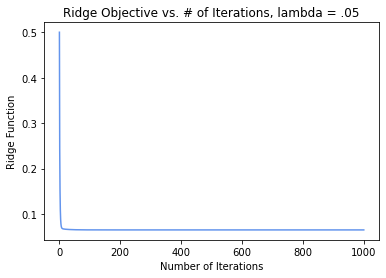

In [13]:
# Plot results
plt.plot(range(max_iters + 1), ridge_function, color = "cornflowerblue")
plt.title(label = 'Ridge Objective vs. # of Iterations, lambda = .05')
plt.xlabel('Number of Iterations')
plt.ylabel('Ridge Function')

$\beta_{T}$ is the final iteration of my implementation of the gradient descent algorithm. Compare this to $\beta*$, which is the scikit-learn implementation of the same method.

In [14]:
lambda_ = .05
lr = 0.5
max_iterations = 1000

# Calculate B_t and B*
beta_t = graddescent(beta_0, lr, max_iterations, lambda_, X_train, y_train)[-1]
beta_star = Ridge(alpha = lambda_).fit(X_train, y_train).coef_

print("Beta_T: ", beta_t)
print("Beta*: ", beta_star)
print("Beta_T - Beta*: ", (beta_t - beta_star))

Beta_T:  [ 0.10612898  0.1071633   0.27768522 -0.12516612  0.58926332 -0.00060885
 -0.03824052  0.27130432]
Beta*:  [ 1.05726103e-01  1.07975282e-01  2.77200565e-01 -1.24846034e-01
  5.91031737e-01 -3.16965703e-04 -3.80511179e-02  2.71328189e-01]
Beta_T - Beta*:  [ 4.02881490e-04 -8.11979775e-04  4.84656577e-04 -3.20084399e-04
 -1.76842103e-03 -2.91881576e-04 -1.89397507e-04 -2.38709836e-05]


The differences between my implementation and the scikit-learn implementation is small, with each $\beta$ being within $\pm0.002$.

Below I will experiment with different learning rates to approach scikit-learn, and show that there is no difference in coefficients even after doubling the number of iterations.

In [15]:
lambda_ = .05
lr = 0.5
max_iterations = 2000

# Calculate B_T and B*
beta_t = graddescent(beta_0, lr, max_iterations, lambda_, X_train, y_train)[-1]
beta_star = Ridge(alpha = lambda_).fit(X_train, y_train).coef_

print("Beta_T: ", beta_t)
print("Beta*: ", beta_star)
print("Beta_T - Beta*: ", (beta_t - beta_star))

Beta_T:  [ 0.10612898  0.1071633   0.27768522 -0.12516612  0.58926332 -0.00060885
 -0.03824052  0.27130432]
Beta*:  [ 1.05726103e-01  1.07975282e-01  2.77200565e-01 -1.24846034e-01
  5.91031737e-01 -3.16965703e-04 -3.80511179e-02  2.71328189e-01]
Beta_T - Beta*:  [ 4.02881222e-04 -8.11979341e-04  4.84656227e-04 -3.20084135e-04
 -1.76842000e-03 -2.91881465e-04 -1.89397411e-04 -2.38709617e-05]


I will also compare on $\lambda=-5$ with the same $\eta=0.5$ and 1000 iterations.

In [16]:
lambda_ = -5
lr = 0.5
max_iterations = 1000

# Calculate B_T and B_*
beta_t = graddescent(beta_0, lr, max_iterations, lambda_, X_train, y_train)[-1]
beta_star = Ridge(alpha = lambda_).fit(X_train, y_train).coef_

print("Beta_T: ", beta_t)
print("Beta*: ", beta_star)
print("Beta_T - Beta*: ", (beta_t - beta_star))

Beta_T:  [-2.48061023  4.34534027 -3.10077571  2.40865162 10.62446231  1.10450304
  0.90032332  0.47632756]
Beta*:  [ 1.56033388e-02  2.73855884e-01  1.62297805e-01 -4.44177922e-02
  9.65973968e-01  5.16806481e-02 -1.99577448e-04  2.76727501e-01]
Beta_T - Beta*:  [-2.49621357  4.07148438 -3.26307352  2.45306942  9.65848834  1.05282239
  0.9005229   0.19960006]


My implementation departs considerably from scikit-learn with negative $\lambda$.

In [17]:
lambda_ = -5
lr = 0.5
max_iterations = 2000

# Calculate Beta_T and Beta*
beta_t = graddescent(beta_0, lr, max_iterations, lambda_, X_train, y_train)[-1]
beta_star = Ridge(alpha = lambda_).fit(X_train, y_train).coef_

print("Beta_T: ", beta_t)
print("Beta*: ", beta_star)
print("Beta_T - Beta*: ", (beta_t - beta_star))

Beta_T:  [ -8.94503161  14.80469143 -11.54206982   8.78698261  35.51070022
   3.77737578   3.20928403   1.00655219]
Beta*:  [ 1.56033388e-02  2.73855884e-01  1.62297805e-01 -4.44177922e-02
  9.65973968e-01  5.16806481e-02 -1.99577448e-04  2.76727501e-01]
Beta_T - Beta*:  [ -8.96063495  14.53083554 -11.70436763   8.83140041  34.54472625
   3.72569513   3.2094836    0.72982469]


The variance only increases as the number of iterations are increased.

Next, I will test different values for $\eta$ to obtain the optimal learning rate.

In [18]:
etas = np.logspace(-3, 1)
max_iterations = 1000
lambda_ = .05
results = np.zeros((len(etas), 2))

for i, e in enumerate(etas):
    # Get optimal betas from gradient descent using varying learning rates
    b = graddescent(beta_0, e, max_iterations, lambda_, X_train, y_train)[-1]
    results[i, 0] = e
    results[i, 1] = objective_f(b, lambda_, X_train, y_train)

results_df = pd.DataFrame(results, columns = ['eta', 'f'])

# Save learning rate that minimizes objective function
min_eta = results_df['eta'][results_df['f'] == results_df['f'].min()].values
min_eta

Text(0, 0.5, 'Objective F value')

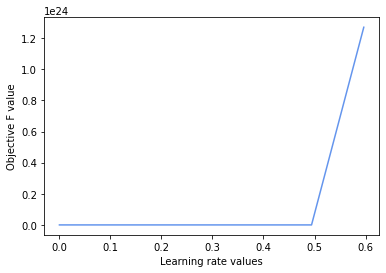

In [19]:
plt.plot(results_df['eta'], results_df['f'], color = "cornflowerblue")
plt.xlabel('Learning rate values')
plt.ylabel('Objective F value')

Re-run gradient descent for ridge regression using the optimal learning rate.

In [21]:
lambda_ = .05
lr = min_eta
max_iterations = 1000

# Calculate B_T and B*
beta_t = graddescent(beta_0, lr, max_iterations, lambda_, X_train, y_train)[-1]
beta_star = Ridge(alpha = lambda_).fit(X_train, y_train).coef_
print("Beta_T - Beta*: ", (beta_t - beta_star))

# Calculate F(B_t) and F(B*)
f_t = objective_f(beta_t, lambda_, X_train, y_train)
f_star = objective_f(beta_star, lambda_, X_train, y_train)
print("F_T - F_star: ", (f_t - f_star))

Beta_T - Beta*:  [ 4.02881560e-04 -8.11979887e-04  4.84656668e-04 -3.20084468e-04
 -1.76842130e-03 -2.91881605e-04 -1.89397532e-04 -2.38709894e-05]
F_T - F_star:  -9.188155949968468e-08


My $\beta_{T}$ does not differ greatly from scikit-learn's $\beta*$. However, $F(\beta_{T}) < F(\beta*)$. This indicates that scikit-learn's implementation does not minimize the exact ridge function that my implementation minimizes, which is:
$$
F(\beta) = \frac{1}{2n}\sum_{i=1}^n (y_i - x_i^\top \beta)^2 + \frac{\lambda}{n} ||\beta||_2^2,
$$
It's possible that scikit-learn's ridge regression function is specified slightly differently. Or, it is also possible that scikit-learn assumes a different $\eta$ for the learning rate, one which is slightly different from the minimum I found.

Now I'll change the stopping criteria to be from number of iterations to be $\epsilon$-stationary condition, such that $||\nabla F(\beta)|| \leq \epsilon$.

In [24]:
def graddescent_e(init_point, step_size, tolerance, *args):
    """Gradient of g.

	Parameters
	----------
    init_point : numpy.ndarray
		A numpy array of size (p+1) where p is the number of predictors. 
        It is an initial starting point of betas to begin gradient descent.
    step_size : float
		Learning rate, or step size in optimization.
    tolerance : float
        Run gradient descent until gradient is less than or equal to tolerance.
    *args : lambda_, X, and Y

	Returns
	-------
	beta_iters : list[numpy.ndarray]
		A list of numpy arrays, each of size (d,), containing the iterates of GD.
	"""
    beta_iters = [init_point]
    gradient = computegrad(init_point, *args)
    beta = init_point
    
    while np.linalg.norm(gradient)**2 > tolerance:
        beta = beta - step_size * gradient
        gradient = computegrad(beta, *args)
        beta_iters.append(beta)
    
    return beta_iters

Run the updated gradient descent algorithm for ridge regression using an error tolerance instead of number of iterations.

Text(0, 0.5, 'Ridge Function')

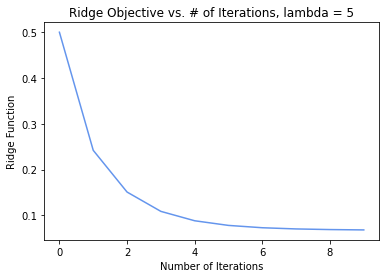

In [25]:
lambda_ = .05
lr = 0.5
tolerance = .005

# Calculate results
grad_desc_betas = graddescent_e(beta_0, lr, tolerance, lambda_, X_train, y_train)
ridge_function = [objective_f(b, lambda_, X_train, y_train) for b in grad_desc_betas]

# Create plots
plt.plot(range(len(ridge_function)), ridge_function, color = "cornflowerblue")
plt.title(label = 'Ridge Objective vs. # of Iterations, lambda = .05')
plt.xlabel('Number of Iterations')
plt.ylabel('Ridge Function')

The algorithm stops iterating on gradient descent after roughly 10 iterations until it gets within the tolerance. The ridge function decreases exponentially, making progressively smaller steps as the number of iterations increases.

In [26]:
lambda_ = .05
lr = 0.5
tolerance = 0.005

# Calculate B_T and B*
beta_t = graddescent_e(beta_0, lr, tolerance, lambda_, X_train, y_train)[-1]
beta_star = Ridge(alpha = lambda_).fit(X_train, y_train).coef_

print("Beta_T: ", beta_t)
print("Beta*: ", beta_star)
print("Beta_T - Beta*: ", (beta_t - beta_star))

Beta_T:  [ 0.17299254 -0.04499575  0.34790864 -0.16700237  0.31289569 -0.07998746
 -0.08344694  0.28767493]
Beta*:  [ 1.05726103e-01  1.07975282e-01  2.77200565e-01 -1.24846034e-01
  5.91031737e-01 -3.16965703e-04 -3.80511179e-02  2.71328189e-01]
Beta_T - Beta*:  [ 0.06726644 -0.15297103  0.07070807 -0.04215634 -0.27813605 -0.07967049
 -0.04539582  0.01634674]


Setting the tolerance $\epsilon = .005$ as the stopping condition leads to significantly different optimal betas between the two implementations.

Text(0, 0.5, 'Objective F value')

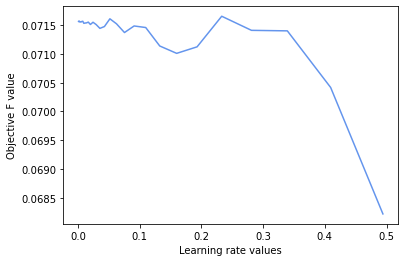

In [27]:
etas = np.logspace(-3, 1)
tolerance = .005
lambda_ = .05
results = np.zeros((len(etas), 2))

for i, e in enumerate(etas):
    # Get optimal betas from gradient descent using varying learning rates
    b = graddescent_e(beta_0, e, tolerance, lambda_, X_train, y_train)[-1]
    results[i, 0] = e
    results[i, 1] = objective_f(b, lambda_, X_train, y_train)

results_df = pd.DataFrame(results, columns = ['eta', 'f'])
min_eta = results_df['eta'][results_df['f'] == results_df['f'].min()].values

# Plot results
plt.plot(results_df['eta'], results_df['f'], color = "cornflowerblue")
plt.xlabel('Learning rate values')
plt.ylabel('Objective F value')

Using the error tolerance as a parameter leads to an interesting shape of the objective F being minimized with variable learning rates, but validates previous findings that values around $\eta=0.5$ are optimal.

In [28]:
lambda_ = .05
lr = min_eta
tolerance = .005

# Calculate B_T and B*
beta_t = graddescent_e(beta_0, lr, tolerance, lambda_, X_train, y_train)[-1]
beta_star = Ridge(alpha = lambda_).fit(X_train, y_train).coef_
print("Beta_T - Beta*: ", (beta_t - beta_star))

# Calculate F(B_T) and F(B*)
f_t = objective_f(beta_t, lambda_, X_train, y_train)
f_star = objective_f(beta_star, lambda_, X_train, y_train)
print("F_T - F_star: ", (f_t - f_star))

Beta_T - Beta*:  [ 0.06660729 -0.15149366  0.0685847  -0.04093475 -0.28094337 -0.07871482
 -0.04506106  0.01669291]
F_T - F_star:  0.0030430629470064863


Using the version of descent with the stopping condition set to $\epsilon=.005$ performs worse at minimization of the objective function compared to scikit-learn's implementation. This is presumably because it does not necessarily find the global minimum - the algorithm stops when it within some variable tolerance of the minimum. We trade off the computing power required (this method runs fewer iterations) for worse results.

## Exercise 4

In [30]:
import statsmodels.api as sm

In [31]:
# Import data and drop NAs.
url = 'https://www.statlearning.com/s/Auto.csv'
auto = pd.read_csv(url, sep = ',', header = 0, na_values = '?')
print(auto.shape)
auto.dropna(axis = 0, inplace = True)
print(auto.shape)

(397, 9)
(392, 9)


In [32]:
# Add a column of 1s for the intercept
auto['constant'] = 1

In [33]:
ols_model = sm.OLS(auto['mpg'], auto[['weight', 'constant']]).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Thu, 15 Apr 2021   Prob (F-statistic):          6.02e-102
Time:                        13:17:06   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
constant      46.2165      0.799     57.867      0.000      44.646      47.787
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model estimates the relationship ${mpg} = \beta_0 + \beta_{1}weight + \epsilon$ where $\epsilon \sim N(0, \sigma^2)$

There is a relationship between the predictor and response, as shown by the statistically significant coefficient $\beta_{1}$ which has $t = -29.6$ and $p < 0.001$.

There does seem to be a strong linear relationship between the predictor, weight, and the response, mpg. This is indicated in the $R^2$ value, which is 0.69. This is quite high and indicates that almost 70% of the variance in mpg can be explained by the linear relationship with weight.

The relationship between weight and mpg is negative, as indicated by the sign on $\beta_{1}$ which is negative. 

Text(0.5, 1.0, 'Linear Regression')

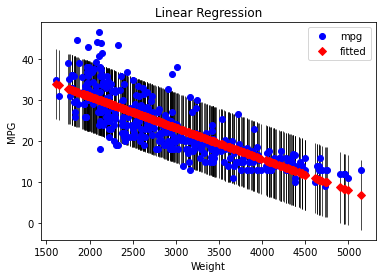

In [34]:
# Plot the y and regression fit.
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(ols_model, 0, ax = ax)
ax.set_ylabel("MPG")
ax.set_xlabel("Weight")
ax.set_title("Linear Regression")

Text(0, 0.5, 'Residual')

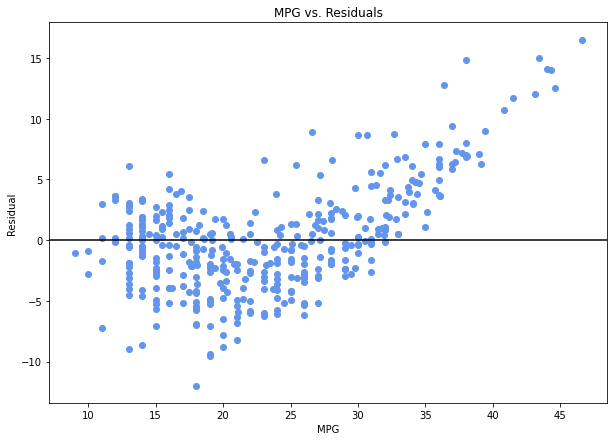

In [35]:
# Residual plot
plt.figure(figsize = (10, 7))
plt.scatter(auto['mpg'], ols_model.resid, c = "cornflowerblue", marker = 'o')
plt.axhline(c = 'black')
plt.title('MPG vs. Residuals')
plt.xlabel('MPG')
plt.ylabel('Residual')

There do seem to be issues with the fit. This is clear in the fact that the residuals are not homoskedastic. For higher MPGs, the model consistently has low predictions. There is a slight curved shape to the residuals in a nike swoosh shape going towards higher MPGs. A linear relationship may not be a good predictor in this range, and the relationship may not be totally linear.